# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\parek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
Bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
#Bitcoin_headlines["articles"][0]
print(f"Number of Bitcoin articles: {Bitcoin_headlines['totalResults']}")

Number of Bitcoin articles: 7254


In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
Ethereum_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
print(f"Number of Bitcoin articles: {Ethereum_headlines['totalResults']}")

Number of Bitcoin articles: 2494


In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
Bitcoin_df = pd.DataFrame.from_dict(Bitcoin_headlines["articles"])
Bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Andrew Tarantola,Hitting the Books: How Bitcoin is somehow wort...,Bitcoin and similar blockchain-based cryptos e...,https://www.engadget.com/hitting-the-books-the...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-09-25T15:30:24Z,Bitcoin and similar blockchain-based cryptos e...
1,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),Bitcoin hits strongest level since May,"<ul><li>Bitcoin, in terms of market value, ros...",https://techncruncher.blogspot.com/2021/10/bit...,https://blogger.googleusercontent.com/img/a/AV...,2021-10-06T17:17:00Z,"<ul><li>Bitcoin, in terms of market value, ros..."
2,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),"BTC, DOGE, and SHIBA Price Analysis for October 6",How high are the chances of Bitcoin sustaining...,https://techncruncher.blogspot.com/2021/10/btc...,None,2021-10-06T19:49:00Z,How high are the chances of Bitcoin sustaining...
3,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),JPMorgan CEO Says Bitcoin Has No Intrinsic Val...,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,https://techncruncher.blogspot.com/2021/10/jpm...,None,2021-10-04T19:49:00Z,JPMorgan CEO Jamie Dimon is still not a Bitcoi...
4,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),Why have Elon Musk and Tesla suddenly turned a...,Elon Musk has performed a sudden U-turn on bit...,https://techncruncher.blogspot.com/2021/09/why...,https://blogger.googleusercontent.com/img/a/AV...,2021-09-28T20:03:00Z,Elon Musk has performed a sudden U-turn on bit...


In [7]:
Bitcoin_headlines["articles"][19]['description']

'Bitcoin hit a six-month high and was within striking distance of a record on Tuesday as traders bet an anticipated listing of a futures-based U.S. exchange traded fund could herald investment flows into bitcoin and cryptocurrency assets.'

In [8]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
Ethereum_df = pd.DataFrame.from_dict(Ethereum_headlines["articles"])
Ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),Nervos launches cross-chain bridge to connect ...,A new cross-chain bridge is currently connecte...,https://techncruncher.blogspot.com/2021/10/ner...,https://blogger.googleusercontent.com/img/a/AV...,2021-10-16T18:50:00Z,A new cross-chain bridge is currently connecte...
1,"{'id': 'the-verge', 'name': 'The Verge'}",Kim Lyons,China’s central bank bans cryptocurrency trans...,China’s central bank on Friday said cryptocurr...,https://www.theverge.com/2021/9/24/22691472/ch...,https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDP...,2021-09-24T16:22:55Z,Its the countrys latest crackdown on digital c...
2,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Mark Cuban Heralds Ethereum, Bitcoin",Mark Cuban has some advice for people who are ...,https://www.entrepreneur.com/article/391242,https://assets.entrepreneur.com/content/3x2/20...,2021-10-14T17:10:45Z,Mark Cuban has some advice for people who are ...
3,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Music company buys NFT of 'Side-eyeing Chloe' ...,The image of two-year-old Chloe Clem making a ...,https://www.bbc.co.uk/news/world-us-canada-586...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-09-25T04:30:25Z,"image source, foundation.app/@SideEyeingChloe\..."
4,"{'id': 'business-insider', 'name': 'Business I...",ilee@insider.com (Isabelle Lee),FTX launches US marketplace for solana NFTs wi...,FTX also plans to roll out support for ethereu...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-10-11T20:28:44Z,"An immersive art installation, which will be c..."


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
1,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
2,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
3,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884
4,2021-09-28,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.091,0.043,0.866


In [10]:
Bitcoin_df['positive'].mean()

0.06365000000000001

In [11]:
Bitcoin_df.sort_values(by='compound', ascending=False).head(1)

,date,text,compound,positive,negative,neutral
14,2021-10-06,A There Will Be Blood-style drama unfolds in C...,0.7269,0.202,0.0,0.798


In [12]:
Bitcoin_df.sort_values(by='positive', ascending=False).head(1)

,date,text,compound,positive,negative,neutral
2,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.0,0.781


In [13]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.0,1.000
2,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
3,2021-09-25,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.101,0.0,0.899
4,2021-10-11,"An immersive art installation, which will be c...",0.0000,0.000,0.0,1.000


In [14]:
Ethereum_df['positive'].mean()

0.04014999999999999

In [15]:
Ethereum_df.sort_values(by='compound', ascending=False).head(1)

,date,text,compound,positive,negative,neutral
6,2021-10-22,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...,0.8225,0.208,0.0,0.792


In [16]:
Ethereum_df.sort_values(by='positive', ascending=False).head(1)

,date,text,compound,positive,negative,neutral
6,2021-10-22,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...,0.8225,0.208,0.0,0.792


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

#In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
#1. Lowercase each word.
#2. Remove Punctuation.
#3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\parek\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
StopWords = stopwords.words('english')
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
StopWords.append("u")
StopWords.append("it'")
StopWords.append("'s")
StopWords.append("n't")
StopWords.append('…')
StopWords.append("\`")
StopWords.append('``')
StopWords.append('char')
StopWords.append("''")
Stopwords = set(StopWords)

In [19]:
Stopwords

{"''",
 "'s",
 '\\`',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'char',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 "n't",
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our

In [25]:
# Complete the tokenizer function
def tokenizer(article):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)   
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase, remove stop words
    tokens = [word.lower() for word in lem if word.lower() not in Stopwords]
    return tokens

In [26]:
Bitcoin_df['text']

0     Bitcoin and similar blockchain-based cryptos e...
1     <ul><li>Bitcoin, in terms of market value, ros...
2     How high are the chances of Bitcoin sustaining...
3     JPMorgan CEO Jamie Dimon is still not a Bitcoi...
4     Elon Musk has performed a sudden U-turn on bit...
5     Specifically, why did someone make a massive p...
6     Its the countrys latest crackdown on digital c...
7     Last week, the Wall Street Journal ran a piece...
8     Twitter will now allow people to tip their fav...
9     Cryptocurrency mining is awildlyenergy-intensi...
10    PayPal has two decades of experience in online...
11    The SEC boss remains mum about the regulatory ...
12    Digital currencies backed by central banks are...
13    Tesla CEO Elon Musk on Tuesday said the U.S. g...
14    A There Will Be Blood-style drama unfolds in C...
15    Representation of cryptocurrency Bitcoin is pl...
16    A representation of the virtual cryptocurrency...
17    19 with 16 posters participating\r\nBitcoi

In [29]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
Bitcoin_df['tokens'] = Bitcoin_df['text'].apply(tokenizer)
#Add Column
cols = ['date', 'text',  'compound', 'positive', 'negative', 'neutral','tokens']
Bitcoin_df = Bitcoin_df[cols]
Bitcoin_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000,"[bitcoin, similar, blockchainbased, cryptos, e..."
1,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924,"[ullibitcoin, term, market, value, rose, lilii..."
2,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, bitcoin, sustaining, gain, push..."
3,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ..."
4,2021-09-28,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.091,0.043,0.866,"[elon, musk, ha, performed, sudden, uturn, bit..."
5,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
6,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000,"[country, latest, crackdown, digital, currenci..."
7,2021-10-08,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.000,0.901,"[last, week, wall, street, journal, ran, piece..."
8,2021-09-24,Twitter will now allow people to tip their fav...,0.5423,0.119,0.034,0.847,"[twitter, allow, people, tip, favorite, conten..."
9,2021-09-27,Cryptocurrency mining is awildlyenergy-intensi...,0.3291,0.075,0.000,0.925,"[cryptocurrency, mining, awildlyenergyintensiv..."


In [30]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
Ethereum_df['tokens'] = Bitcoin_df['text'].apply(tokenizer)
#Add Column
cols = ['date', 'text',  'compound', 'positive', 'negative', 'neutral','tokens']
Ethereum_df = Ethereum_df[cols]
Ethereum_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.000,1.000,"[bitcoin, similar, blockchainbased, cryptos, e..."
1,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000,"[ullibitcoin, term, market, value, rose, lilii..."
2,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.000,1.000,"[high, chance, bitcoin, sustaining, gain, push..."
3,2021-09-25,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.101,0.000,0.899,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ..."
4,2021-10-11,"An immersive art installation, which will be c...",0.0000,0.000,0.000,1.000,"[elon, musk, ha, performed, sudden, uturn, bit..."
5,2021-10-12,Coinbase NFT\r\nRobert Nickelsberg/Getty Image...,0.0000,0.000,0.000,1.000,"[specifically, someone, make, massive, purchas..."
6,2021-10-22,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...,0.8225,0.208,0.000,0.792,"[country, latest, crackdown, digital, currenci..."
7,2021-10-04,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.000,1.000,"[last, week, wall, street, journal, ran, piece..."
8,2021-10-01,By Reuters Staff\r\nOct 1 (Reuters) - Bitcoin ...,0.0000,0.000,0.000,1.000,"[twitter, allow, people, tip, favorite, conten..."
9,2021-10-12,Ive always been vexed by the question of how t...,0.6705,0.146,0.048,0.806,"[cryptocurrency, mining, awildlyenergyintensiv..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [31]:
from collections import Counter
from nltk import ngrams

In [40]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def bigram_counter(corpus): 
    # Combine all articles in corpus (input) into one large string
    big_string = ' '.join(corpus)
    # use tokenizer function on big_string
    processed = tokenizer(big_string)
    # get ngrams where n=2
    bigrams = ngrams(processed, n=2)
    counter = dict(Counter(bigrams))
    # return as a pandas dataframe with two columns
    return pd.DataFrame(list(counter.items()), columns=['bigram', 'count'])

In [41]:
# concatenates bitcoin_df 'text' column Series as a list
Bitcoin_corpus = [Bitcoin_df.text.str.cat()]
# Generate the Bitcoin N-grams where N=2 using bigram_counter function
bigram_counter(Bitcoin_corpus)

,bigram,count
0,"(bitcoin, similar)",1
1,"(similar, blockchainbased)",1
2,"(blockchainbased, cryptos)",1
3,"(cryptos, exhibit)",1
4,"(exhibit, radical)",1
...,...,...
341,"(susingapore, oct)",1
342,"(bitcoin, hit)",1
343,"(hit, sixmonth)",1
344,"(sixmonth, high)",1


In [42]:
# string ethereum articles using ethereum_df 'text' column
Ethereum_corpus = [Ethereum_df.text.str.cat()]

# Generate the Ethereum N-grams where N=2 using bigram_counter function
bigram_counter(Ethereum_corpus)

,bigram,count
0,"(new, crosschain)",1
1,"(crosschain, bridge)",2
2,"(bridge, currently)",1
3,"(currently, connected)",1
4,"(connected, ethereum)",1
...,...,...
289,"(company, said)",1
290,"(said, th)",1
291,"(th, charsnft)",1
292,"(meme, charsrepresentations)",1


In [43]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [44]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_article = Bitcoin_df.text.str.cat()
# Use token_count function to get the top 10 words for Bitcoin 
bitcoin_count = token_count(tokenizer(bitcoin_article), 10)
bitcoin_count

[('bitcoin', 15),
 ('cryptocurrency', 5),
 ('four', 3),
 ('utoday', 3),
 ('country', 3),
 ('bank', 3),
 ('said', 3),
 ('small', 3),
 ('charsa', 3),
 ('illustration', 3)]

In [45]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_article = Ethereum_df.text.str.cat()
# Use token_count function to get the top 10 words for Bitcoin 
ethereum_count = token_count(tokenizer(ethereum_article), 10)
ethereum_count

[('bitcoin', 11),
 ('cryptocurrency', 7),
 ('ethereum', 6),
 ('ha', 5),
 ('nfts', 5),
 ('illustration', 5),
 ('taken', 5),
 ('reuters', 5),
 ('new', 4),
 ('bank', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 0.98, 'Bitcoin Word Cloud')

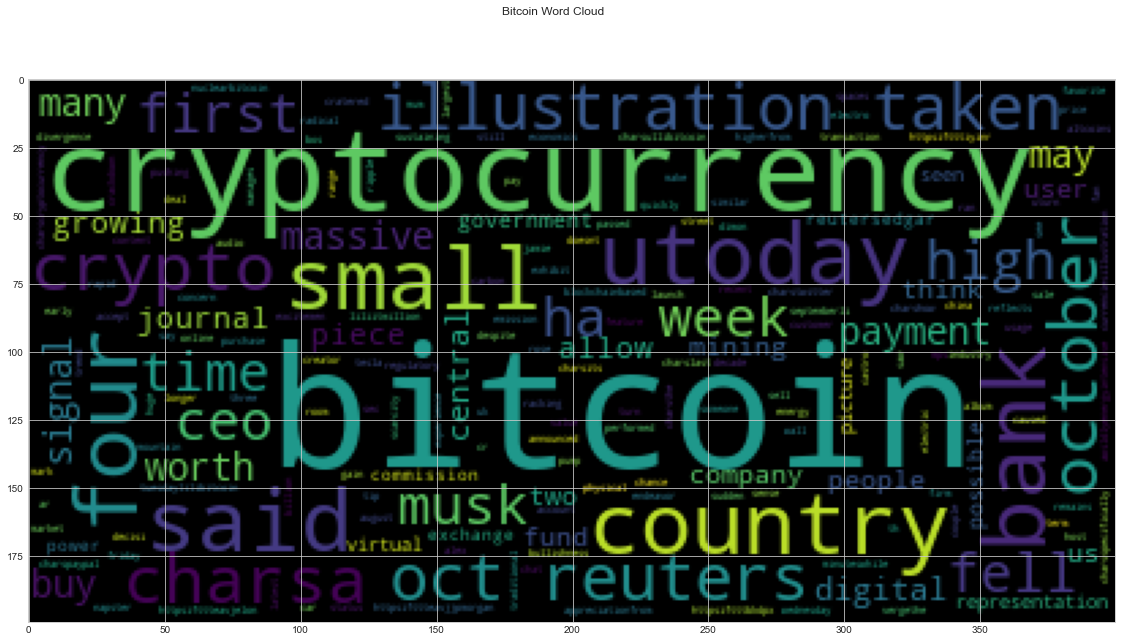

In [47]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_article = Bitcoin_df.text.str.cat()
# tokenize bitcoin_article using tokenizer function
bitcoin_tokens = tokenizer(bitcoin_article)
# join tokens as a big string
big_string_bit = ' '.join(bitcoin_tokens)

# Generate the Bitcoin word cloud and plot
wc_bit = WordCloud().generate(big_string_bit)
plt.imshow(wc_bit)
plt.suptitle('Bitcoin Word Cloud')

Text(0.5, 0.98, 'Ethereum Word Cloud')

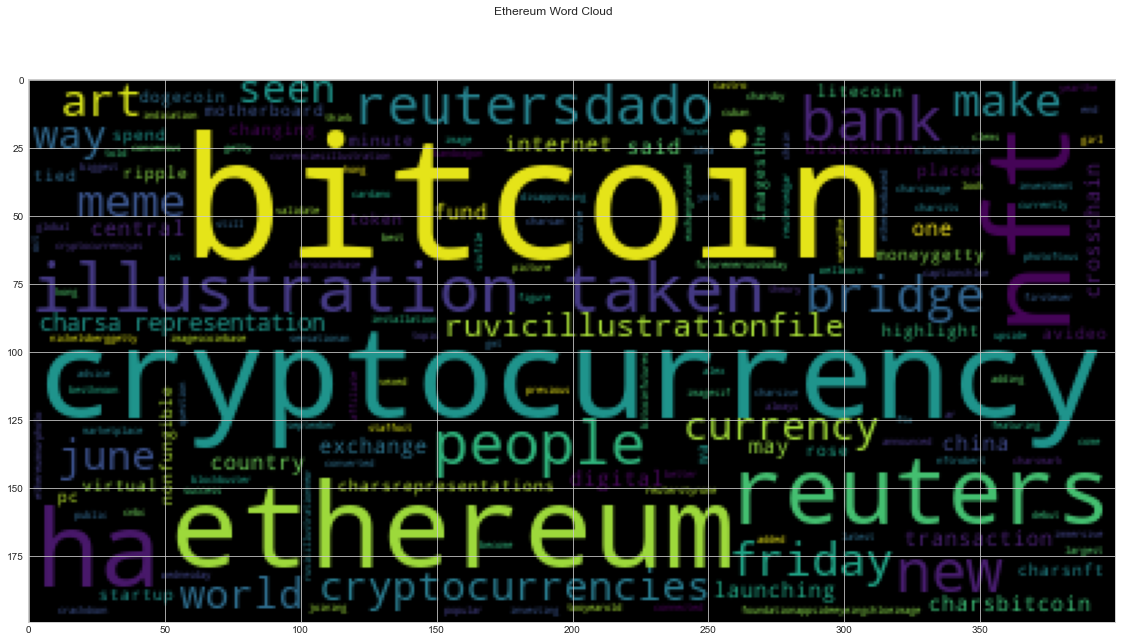

In [48]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ethereum_article = Ethereum_df.text.str.cat()
# tokenize bitcoin_article using tokenizer function
ethereum_tokens = tokenizer(ethereum_article)
# join tokens as a big string
big_string_bit = ' '.join(ethereum_tokens)

# Generate the Bitcoin word cloud and plot
wc_bit = WordCloud().generate(big_string_bit)
plt.imshow(wc_bit)
plt.suptitle('Ethereum Word Cloud')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from nltk.corpus import reuters
from spacy import displacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [2]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [54]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [49]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
Bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
x = range(20)
for x in Bitcoin_headlines:
     article = article + str(Bitcoin_headlines["articles"][i]["description"])    
  

In [55]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(bitcoin_string)
# Add a title to the document
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [156]:
# Render the visualization
# YOUR CODE HERE!
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]

In [157]:
# List all Entities
# YOUR CODE HERE!
entities = [i.lower().replace(' ', '_') for i in entities]

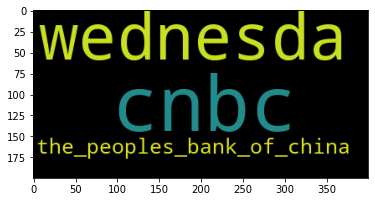

In [158]:
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

---

### Ethereum NER

In [126]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
Ethereum_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
x = range(20)
for x in Ethereum_headlines:
    article = article + str(Ethereum_headlines["articles"][i]["description"])

In [127]:
article

'Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars]Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the most upside, he told CNBC Make It Wednesday. Bitcoin, he added, is better… [+1139 chars]Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the most upside, he told CNBC Make It Wednesday. Bitcoin, he added, is better… [+1139 chars]Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the most upside, he told CNBC Make It Wednesday. Bitcoin, he added, is better… [+1139 chars]Mark Cuban has some advice for people who are new to investing in cryptocurrency.Mark Cuban has some advice for people who are new to

In [128]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(article)
# Add a title to the document
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [136]:
# List all Entities
# YOUR CODE HERE!
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG']]

In [137]:
# lower and join each entity for word cloud creation
entities = [i.lower().replace(' ', '_') for i in entities]

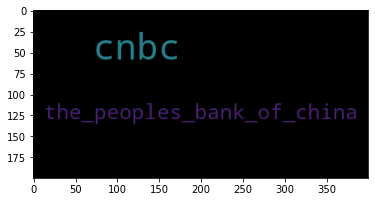

In [138]:
# Render the visualization
# YOUR CODE HERE!
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

---